------
## Predicting Global Supply Chain Outcomes using Machine Learning Methods
------

### **AIB Project**

---
## 1.  Data Analysis 
---

## Trends

In [73]:
import warnings; warnings.simplefilter('ignore')
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import helper16 as scmhelper
from ydata_profiling import ProfileReport
import missingno as msno
import pivottablejs as pvt
import datetime as dt
import os
%matplotlib inline

#### Load data 

In [74]:
# Load in the data
_names =['dnum', 'dnum_country', 'dnum_vendor', 'dnum_factory', 'dnum_brand', 'dnum_molecule_test'
         , 'dnum_lpifsi', 'ddate', 'dobject','dtrend']
data_dict = scmhelper.load_clean_data(_names) 
print("Dataframes available: {} \n The data shapes: \n---{}".format(data_dict.keys()
                                                                    ,[d.shape for d in data_dict.values()]))
#Assign to named dataframes
dnum,dnum_country, dnum_vendor,dnum_factory,dnum_brand,dnum_molecule_test,dnum_lpifsi,ddate, dobject, dtrend = [data_dict[n] for n in _names]
dobject = dobject.apply(lambda x: pd.Categorical(x))
ddate['delivery_delay_time'] = ddate['delivery_delay_time'].apply(lambda x: pd.to_timedelta(x))

trying normal method for: ...  0
Sucess for: ...  0
trying normal method for: ...  1
Sucess for: ...  1
trying normal method for: ...  2
Sucess for: ...  2
trying normal method for: ...  3
Sucess for: ...  3
trying normal method for: ...  4
Sucess for: ...  4
trying normal method for: ...  5
Sucess for: ...  5
trying normal method for: ...  6
Sucess for: ...  6
trying normal method for: ...  7
Sucess for: ...  7
trying normal method for: ...  8
Failed with encoding error, trying again for: ...  8
Sucess for: ...  8
trying normal method for: ...  9
Sucess for: ...  9
Dataframes available: dict_keys(['dnum', 'dnum_country', 'dnum_vendor', 'dnum_factory', 'dnum_brand', 'dnum_molecule_test', 'dnum_lpifsi', 'ddate', 'dobject', 'dtrend']) 
 The data shapes: 
---[(10324, 9), (10324, 12), (10324, 12), (10324, 12), (10324, 12), (10324, 12), (10324, 24), (10324, 10), (10324, 64), (10324, 6)]


#### Profiling

In [63]:
#dnum,dnum_country, dnum_vendor,dnum_factory,dnum_brand
#,dnum_molecule_test,dnum_lpifsi,ddate, dobject
report =ProfileReport(dnum_country,title="AIB Group 15 - Data Profiling Report")
report.to_file("data/results/AIB_Scm.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 135.65it/s]


#### Treands

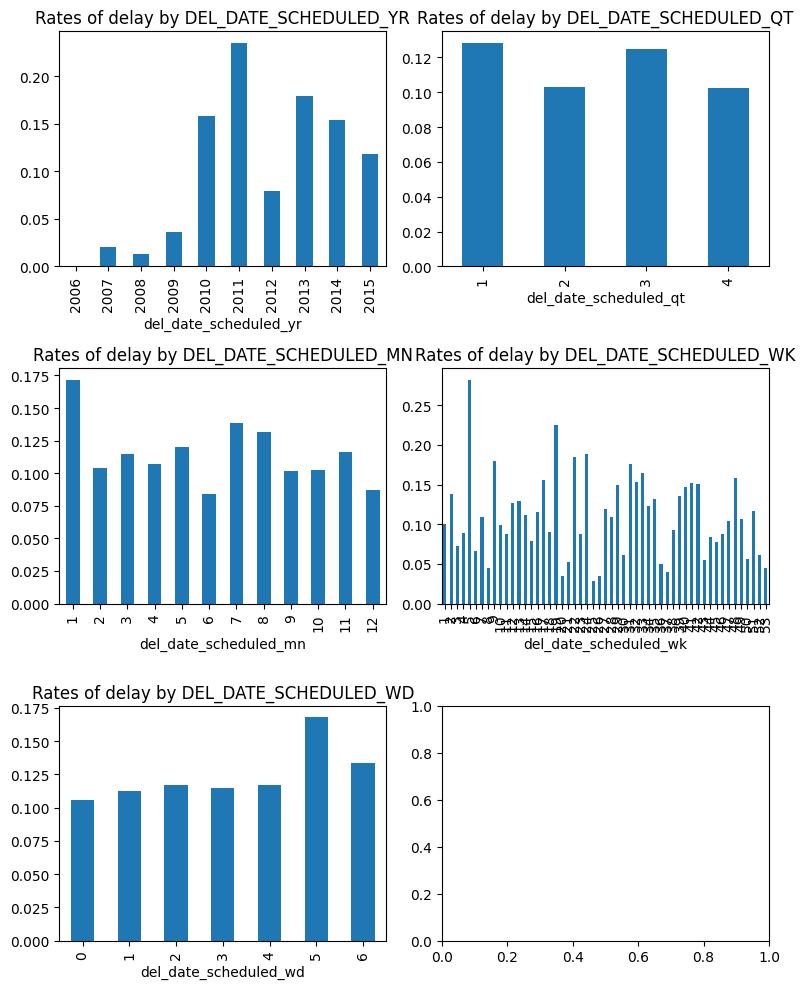

In [75]:
#### over time, can be done
dobject_del = dobject[[c for c in dobject.columns if "del" in c]]
for c in dobject_del:
    dobject_del[c] = pd.to_numeric(dobject_del[c])
# Plot
tcols = ['del_date_scheduled_yr','del_date_scheduled_qt'
 ,'del_date_scheduled_mn', 'del_date_scheduled_wk', 'del_date_scheduled_wd'] 
fig, ((ax0,ax1), (ax2,ax3),(ax4,ax5))= plt.subplots(nrows=3,ncols=2,figsize=(8,10))
axes = [ax0,ax1, ax2,ax3,ax4,ax5]
for i in range(len(tcols)):
    dobject_del.groupby(tcols[i]).agg('mean')['delayed'].plot(kind="bar", ax=axes[i]
                                        ,title = "Rates of delay by "+tcols[i].upper())
plt.tight_layout()

#### Findings..
 
- More delays on items scheduled to arrive over the weekends, but is this significant?
- More delays on items scheduled to arrivein 2010,2011,2013, and 2014, but is this significant?
- Not much signal from the quarter in which we expect delivery to happen. 
    - All very close to the mean of 11.5%
- Looks like these weeks have somewhat high rates of delays 
    - 5, 9, 19, 22, 24
    - 31, 32, 33, 48
    - 40, 41, 42
- Looks like January has higher rates of delay than normal

In [86]:
prices=dnum
po = dobject
print(dnum.shape)
print(dobject.shape)
so = ['po_date'  , 'vendor', 'itm_desc','prod_grp','sub_class']
'''#'pq_date_new_yr', 'pq_date_new_mn', 'pq_date_new_dy',
 #'po_date_new_yr', 'po_date_new_mn', 'po_date_new_dy',
 # 'del_date_scheduled_mn', 'del_date_scheduled_dy'
 #, 'del_date_client_yr', 'del_date_client_mn','del_date_client_dy'
 #, 'del_date_recorded_yr', 'del_date_recorded_mn','del_date_recorded_dy'
 #, 'pq_date_new_wd', 'pq_date_new_wk','pq_date_new_qt'
 #, 'po_date_new_wd', 'po_date_new_wk', 'po_date_new_qt'
 #,'del_date_scheduled_wd', 'del_date_scheduled_wk','del_date_scheduled_qt'
 #, 'del_date_client_wd', 'del_date_client_wk','del_date_client_qt'
 #, 'del_date_recorded_wd', 'del_date_recorded_wk','del_date_recorded_qt'
 #, 'delayed'
 #, 'proj_code', 'pq_no', 'po_no','ship_no'
 #, 'country'
 #   , 'mngr', 'fulfill_via', 'vendor_terms'
 #,'ship_mode'
 #, 'pq_date'
 #   , 'prod_grp', 'sub_class'
    , 'vendor',
 'itm_desc'
 #, 'molecule_test', 'brand', 'dosage'
 #, 'dosage_form','factory'
  #  , 'first_line'
 #, 'weight', 'freight_cost'
 #,'del_date_scheduled_yr', 'ship_config', 'weight_captured_seperately'
 #,'freight_invoiced_seperately', 'freight_in_cmdty_cost'
 #,'factory_address'
 #, 'origin_country'
 #   , 'origin_continent'
 #, 'name'
 #, 'dest_country'
# , 'orig_origin_country'
]'''
do =  dobject[so]
#print(do.head())
'''ttl = ['PO']
fig, ((ax0, ax1),(ax2,ax3),(ax4,ax5))= plt.subplots(nrows=3,ncols=2,figsize=(12,10))
axes = [ax0, ax1,ax2,ax3,ax4,ax5]
condition_df1 = prices['id'].str.endswith('1')
for i in range(len(ndfs)):
    data =pd.concat([ndfs[i],prices], axis=1)
    print(data.head())
#plt.tight_layout()'''
n_measures = ['ln_itm_qty', 'ln_itm_val', 'line_itm_ins'
                , 'ln_itm_weight', 'ln_itm_freight_cost','pk_price']
prod_price = pd.concat([do,dnum[n_measures]], axis=1))

(10324, 9)
(10324, 64)
                 po_date                                             vendor  \
0      Date Not Captured                        RANBAXY Fine Chemicals LTD.   
1      Date Not Captured                           Aurobindo Pharma Limited   
2      Date Not Captured                               Abbott GmbH & Co. KG   
3      Date Not Captured  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4      Date Not Captured                           Aurobindo Pharma Limited   
...                  ...                                                ...   
10319     N/A - From RDC                                      SCMS from RDC   
10320     N/A - From RDC                                      SCMS from RDC   
10321     N/A - From RDC                                      SCMS from RDC   
10322     N/A - From RDC                                      SCMS from RDC   
10323     N/A - From RDC                                      SCMS from RDC   

                            